In [2]:
import numpy as np
import numpy.random as npr
import cvxpy as cp
import time
import matplotlib.pyplot as plt

from formulations import *

import os
import imageio

## Feasibility regions

In [2]:
def reshape_w(w, new_len, zero_loc):
    assert(len(zero_loc) == 2)

    w_new = np.zeros(new_len)
    w_new[zero_loc[0]] = w[0]
    w_new[zero_loc[1]] = w[1]

    return w_new


In [3]:
m = 5
n = 3

num_pts = 30
npr.seed(2)

t = np.linspace(0,np.pi*2+0.01,num_pts)
circ = np.vstack((np.cos(t),np.sin(t))).T


Data_sdp = np.zeros((num_pts, 2))
Data_lp = np.zeros((num_pts, 2))

K_mat = rand_01_mat(m,n)
zero_loc = [2,3]
r = 1


for i in range(num_pts):
    w = reshape_w(circ[i,:], m, zero_loc)
    Data_sdp[i, :] = misp_sdp(K_mat, w, r, feas=True, x_test = False)[1][zero_loc]
    Data_lp[i, :] = misp_lp(K_mat, w, r, feas=True, x_test = False)[2][zero_loc]

x, y = Data_sdp[:,0], Data_sdp[:,1]
x1,y1 = Data_lp[:,0], Data_lp[:,1]


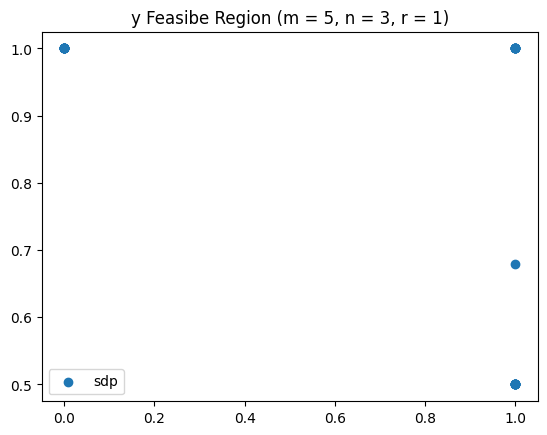

In [12]:
plt.scatter(x1,y1, label = "lp")
plt.scatter(x,y, label = "sdp")
# plt.xlim(-0.2,1.2)
# plt.ylim(-0.2,1.2)
# plt.scatter(x1,y1, label = "lp")
plt.title("y Feasibe Region (m = {}, n = {}, r = {})".format(m,n,r))
plt.legend()

In [ ]:
filenames = []
for i in range(num_pts):
    plt.scatter(x[:i],y[:i], label = "sdp")
    plt.xlim(-0.2,1.2)
    plt.ylim(-0.2,1.2)
    # plt.scatter(x1,y1, label = "lp")
    plt.title("Feasibe Region (m = {}, n = {}, r = {})".format(m,n,r))
    plt.legend()

    filename = f'gif_images/{i}.png'
    filenames.append(filename)
    plt.savefig(filename)
    plt.close()

with imageio.get_writer('gifs/feas.gif', mode='I') as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)




/var/folders/19/8vdtx5nd3sq7rqsqkrvs3vj80000gn/T/ipykernel_9769/707833979.py:17: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)


# Swapped Problem

In [4]:
 a = np.ones((3,3))
a[0,2] = 0
a[2,0] = 0

In [6]:
np.linalg.eigvals(a)

array([-0.41421356,  1.        ,  2.41421356])